<a href="https://colab.research.google.com/github/somersgreg-classwork/Build_Week-AirBnB/blob/main/BE/AirBnB_Project_U4bw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# !pip install awscli
# import os
# !export AWS_SHARED_CREDENTIALS_FILE=/content/drive/My\ Drive/config/awscli.ini
# path = "/content/drive/My Drive/config/awscli.ini"
# os.environ['AWS_SHARED_CREDENTIALS_FILE'] = path
# print(os.environ['AWS_SHARED_CREDENTIALS_FILE'])

In [ ]:
# !aws s3 ls s3://amazonaws.com/tomslee-airbnb-data-2/ --recursive --human-readable --summarize
# An error occurred (AllAccessDisabled) when calling the ListObjectsV2 operation: All access to this object has been disabled

In [ ]:
# !aws configure
# AWS Access Key ID [None]: ***
# AWS Secret Access Key [None]: ***
# Default region name [None]: us-east-1
# Default output format [None]: json

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

## IMPORT LIBRARIES

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import random
# For reproducability
np.random.seed(42)
random.seed(42)

## LOAD DATA
https://tomslee.net/category/airbnb-data  
https://github.com/tomslee/airbnb-data-collection

https://s3.amazonaws.com/tomslee-airbnb-data-2/frankfurt.zip
https://s3.amazonaws.com/tomslee-airbnb-data-2/miami.zip

- ***room_id***: A unique number identifying an Airbnb listing. The listing has a URL on the Airbnb web site of http://airbnb.com/rooms/room_id  
- ***host_id***: A unique number identifying an Airbnb host. The host’s page has a URL on the Airbnb web site of http://airbnb.com/users/show/host_id  
- ***room_type***: One of “Entire home/apt”, “Private room”, or “Shared room”
- ***borough***: A subregion of the city or search area for which the survey is carried out.
- ***neighborhood***: As with borough: a subregion of the city or search area for which the survey is carried out. For cities that have both, a neighbourhood is smaller than a borough. For some cities there is no neighbourhood information.
- ***reviews***: The number of reviews that a listing has received. Airbnb has said that 70% of visits end up with a review, so the number of reviews can be used to estimate the number of visits. Note that such an estimate will not be reliable for an individual listing (especially as reviews occasionally vanish from the site), but over a city as a whole it should be a useful metric of traffic.
- ***overall_satisfaction***: The average rating (out of five) that the listing has received from those visitors who left a review.
- ***accommodates***: The number of guests a listing can accommodate.
- ***bedrooms***: The number of bedrooms a listing offers.
- ***price***: The price (in $US) for a night stay. In early surveys, there may be some values that were recorded by month.
- ***minstay***: The minimum stay for a visit, as posted by the host.
- ***latitude and longitude***: The latitude and longitude of the listing as posted on the Airbnb site.
- ***last_modified***: the date and time that the values were read from the Airbnb web site.

*The first line of the CSV file holds the column headings.*

In [ ]:
link = 'https://drive.google.com/file/d/1Pdm9xL9MeT33B7PhQtCR_BVJK0HiNizj/view?usp=sharing' # The shareable link

# to get the id part of the file
id = link.split("/")[-2]
print(id) # to verify
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('tomslee_airbnb_miami_1423_2017-07-09.csv') 
# I had to turn off g.drive setting 'Convert uploaded files to G editor format as this caused meta error.
miami = pd.read_csv('tomslee_airbnb_miami_1423_2017-07-09.csv')


1Pdm9xL9MeT33B7PhQtCR_BVJK0HiNizj


In [ ]:
miami.columns

Index(['room_id', 'survey_id', 'host_id', 'room_type', 'country', 'city',
       'borough', 'neighborhood', 'reviews', 'overall_satisfaction',
       'accommodates', 'bedrooms', 'bathrooms', 'price', 'minstay', 'name',
       'last_modified', 'latitude', 'longitude', 'location'],
      dtype='object')

In [ ]:
miami.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,15953604,1423,102957874,Shared room,NaN,Miami,NaN,3,7,4.0,4,1,NaN,55,NaN,SHARE BEDROOM IN HOUSE // BEST LOCATION OF MIA...,2017-07-09 21:01:50,25.803063,-80.188324,0101000020E610000052431B800D0C54C0AEA0698995CD...
1,16074084,1423,102957874,Shared room,NaN,Miami,NaN,3,5,5.0,4,1,NaN,55,NaN,SHARE BEDROOM IN HOUSE // BEST LOCATION OF MIA...,2017-07-09 21:01:50,25.803247,-80.188888,0101000020E6100000D7A6B1BD160C54C0309C6B98A1CD...
2,19340984,1423,47616852,Shared room,NaN,Miami,NaN,4,0,0.0,2,1,NaN,58,NaN,Livin' La Vida Miami! Surrounded by ocean views!,2017-07-09 21:01:50,25.851549,-80.160510,0101000020E6100000952BBCCB450A54C006F1811DFFD9...
3,17927738,1423,76853108,Shared room,NaN,Miami,NaN,3,4,4.5,2,1,NaN,28,NaN,1A - Shared room 5 minutes from MIA,2017-07-09 21:01:48,25.814427,-80.237344,0101000020E6100000B779E3A4300F54C0B9FAB1497ED0...
4,14872154,1423,92728943,Shared room,NaN,Miami,NaN,5,44,4.5,2,1,NaN,40,NaN,Miami Crash Pad 2,2017-07-09 21:01:48,25.792647,-80.247307,0101000020E61000009A44BDE0D30F54C0C345EEE9EACA...


## DATA PREPARATION
### EXPLORATORY DATA ANALYSIS (EDA)

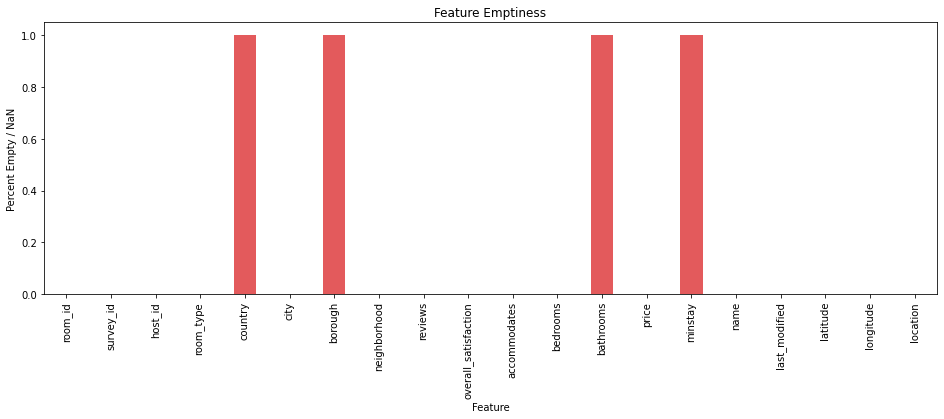

In [ ]:
%matplotlib inline

percentage_missing_data = miami.isnull().sum() / miami.shape[0]
ax = percentage_missing_data.plot(kind = 'bar', color='#E35A5C', figsize = (16, 5))
ax.set_xlabel('Feature')
ax.set_ylabel('Percent Empty / NaN')
ax.set_title('Feature Emptiness')
plt.show()

Above chart shows columns with high number of nulls which should be removed as they contribute less to our model. 

In [ ]:
miami.describe()

,room_id,survey_id,host_id,country,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude
count,8.824000e+03,8824.0,8.824000e+03,0.0,0.0,8824.000000,8824.000000,8824.000000,8824.000000,8824.000000,0.0,8824.000000,0.0,8824.000000,8824.000000
mean,1.219583e+07,1423.0,4.312163e+07,NaN,NaN,4.763259,17.587262,2.716512,4.119334,1.282978,NaN,184.979601,NaN,25.792462,-80.173301
std,5.760436e+06,0.0,4.007562e+07,NaN,NaN,1.178236,32.895320,2.315812,2.323818,0.990743,NaN,409.900848,NaN,0.036554,0.046729
min,2.055000e+03,1423.0,2.254000e+03,NaN,NaN,2.000000,0.000000,0.000000,1.000000,0.000000,NaN,10.000000,NaN,25.685674,-80.334390
25%,7.297238e+06,1423.0,9.090002e+06,NaN,NaN,4.000000,0.000000,0.000000,2.000000,1.000000,NaN,79.000000,NaN,25.769159,-80.195521
50%,1.366327e+07,1423.0,2.994861e+07,NaN,NaN,5.000000,5.000000,4.500000,4.000000,1.000000,NaN,120.000000,NaN,25.787031,-80.184685
75%,1.719169e+07,1423.0,6.814276e+07,NaN,NaN,5.000000,20.000000,5.000000,5.000000,2.000000,NaN,200.000000,NaN,25.817931,-80.131852
max,1.976310e+07,1423.0,1.391897e+08,NaN,NaN,13.000000,517.000000,5.000000,20.000000,10.000000,NaN,10000.000000,NaN,25.887680,-80.116704


Notably we have 8824 reviews. Of these we will try to classify as neutral, positive and negative.  Overall satisfation is 4.5+ in the higher quartiles. I think this means we have a more high reviews than low.  Country, borough, and bathrooms are empty so will remove these. 

In [ ]:
miami = miami.drop(['country', 'borough', 'bathrooms', 'minstay', 'last_modified', 'location', 'city', 'room_id', 'survey_id', 'host_id'], axis=1)

In [ ]:
miami.head()

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,latitude,longitude
0,Shared room,3,7,4.0,4,1,55,SHARE BEDROOM IN HOUSE // BEST LOCATION OF MIA...,25.803063,-80.188324
1,Shared room,3,5,5.0,4,1,55,SHARE BEDROOM IN HOUSE // BEST LOCATION OF MIA...,25.803247,-80.188888
2,Shared room,4,0,0.0,2,1,58,Livin' La Vida Miami! Surrounded by ocean views!,25.851549,-80.160510
3,Shared room,3,4,4.5,2,1,28,1A - Shared room 5 minutes from MIA,25.814427,-80.237344
4,Shared room,5,44,4.5,2,1,40,Miami Crash Pad 2,25.792647,-80.247307


In [ ]:
miami.isnull().sum()

room_type               0
neighborhood            0
reviews                 0
overall_satisfaction    0
accommodates            0
bedrooms                0
price                   0
name                    4
latitude                0
longitude               0
dtype: int64

In [ ]:
miami.drop(['name'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


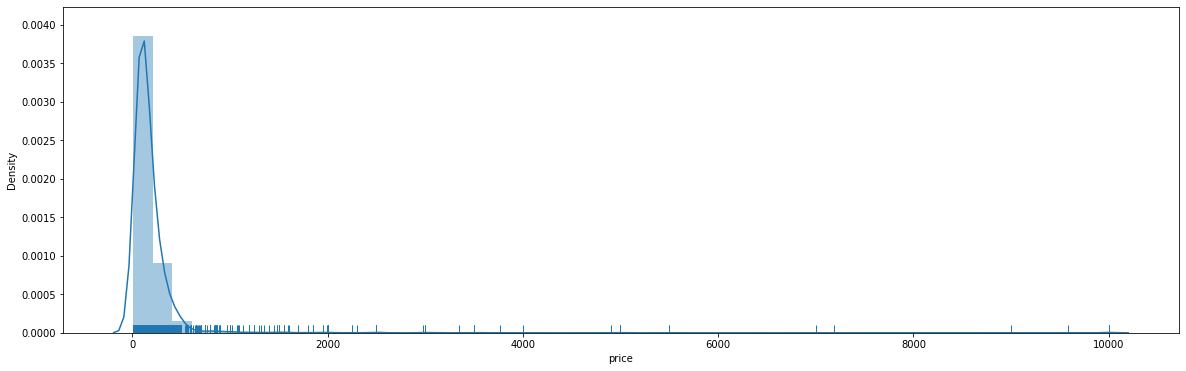

In [ ]:
plt.figure(figsize=(20,6))
sb.distplot(miami['price'], rug=True)

Some extreme prices here. I think some prices are for different time frames but how to convert them so all are per day?  Perhaps I can drop extreme 5%?  Will this make all predictions better but extreme predictions impossible? 

In [ ]:
miami['room_type'].unique()

array(['Shared room', 'Entire home/apt', 'Private room'], dtype=object)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


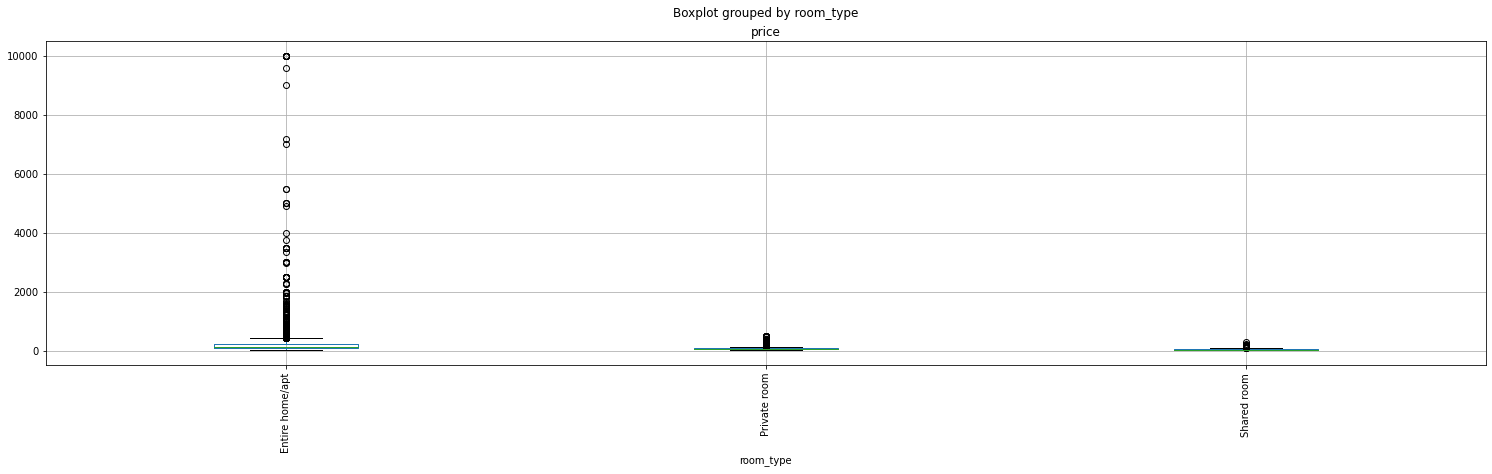

In [ ]:
miami.boxplot(column='price', by='room_type', figsize=(25,6), rot=90)

In [ ]:
new_miami = miami[((miami['price'] - miami['price'].mean()) / miami['price'].std()).abs() < 3]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


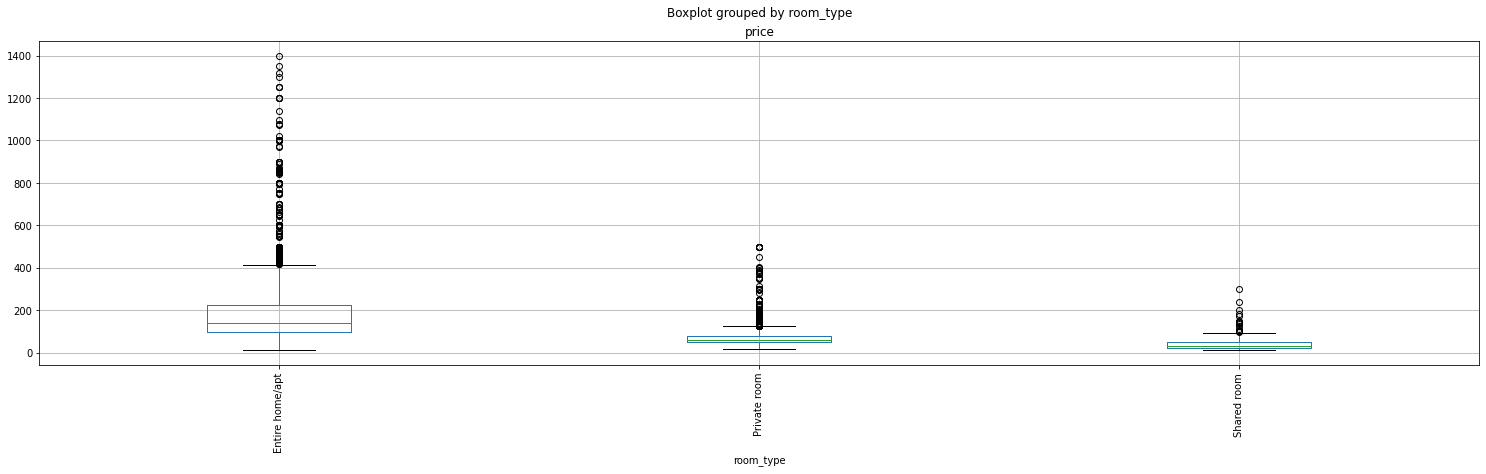

In [ ]:
new_miami.boxplot(column='price', by='room_type', figsize=(25,6), rot=90)

Explain box and whiskers plot. 
This new plot will likely produce better predictions but I should test that.



In [ ]:
miami['neighborhood'].nunique()

9

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


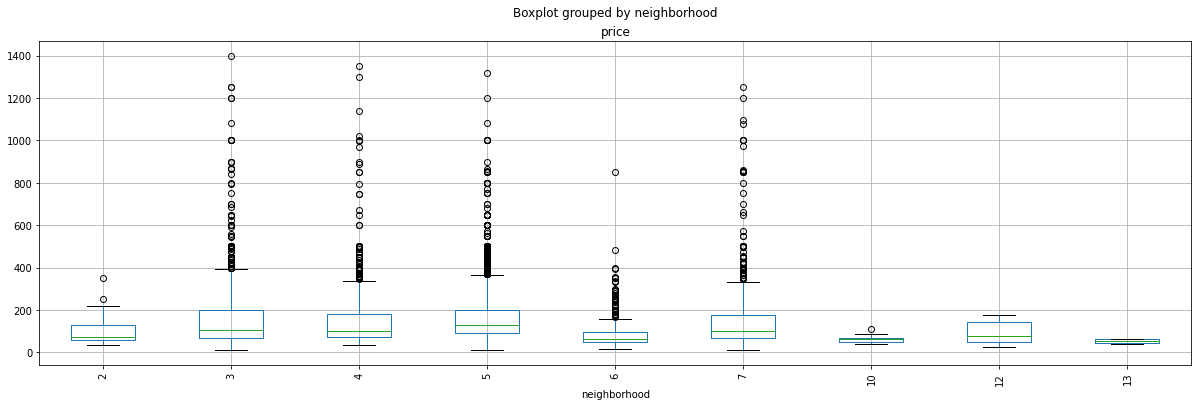

In [ ]:
new_miami.boxplot(column='price', by='neighborhood', figsize=(20,6), rot=90)

In [ ]:
miami['neighborhood'].value_counts()

5     5189
3     1712
7      824
4      744
6      299
2       24
12      16
10      12
13       4
Name: neighborhood, dtype: int64

In [ ]:
pd.value_counts(miami.neighborhood)

5     5189
3     1712
7      824
4      744
6      299
2       24
12      16
10      12
13       4
Name: neighborhood, dtype: int64